In [4]:
exec(open("../../header.py").read())

In [5]:
from nltk.tokenize import sent_tokenize
from datasets import load_from_disk
import matplotlib.pyplot as plt
import numpy as np

In [6]:
all_roots

{'DATA_DIR': '/home/ay1626/NLU_data/',
 'RAW_DIR': '/home/ay1626/NLU_data/raw/',
 'SEGMENT_DIR': '/home/ay1626/NLU_data/segmentations/',
 'EMBEDDINGS_DIR': '/home/ay1626/NLU_data/embeddings/',
 'RESULTS_DIR': '/home/ay1626/NLU_data/results/'}

In [7]:
os.listdir(SEGMENT_DIR('20news/bert-base-uncased/train'))

['bydate_sci.crypt_qid_struct.pkl',
 'bydate_comp.windows.x_qid_struct.pkl',
 'bydate_talk.politics.misc_qid_struct.pkl',
 'bydate_sci.med_qid_struct.pkl',
 'label_to_cutoff_indices_0.6.pkl',
 'bydate_talk.religion.misc_qid_struct.pkl',
 'bydate_rec.autos_qid_struct.pkl',
 'bydate_comp.graphics_qid_struct.pkl',
 'bydate_comp.os.ms-windows.misc_qid_struct.pkl',
 'bydate_rec.sport.hockey_qid_struct.pkl',
 'label_to_cutoff_indices_0.96.pkl',
 'bydate_soc.religion.christian_qid_struct.pkl',
 'label_to_cutoff_indices_0.55.pkl',
 'bydate_comp.sys.mac.hardware_qid_struct.pkl',
 'label_to_cutoff_indices_1.0.pkl',
 'label_to_cutoff_indices_0.98.pkl',
 'bydate_rec.motorcycles_qid_struct.pkl',
 'label_to_cutoff_indices_0.97.pkl',
 'label_to_cutoff_indices_0.9.pkl',
 'bydate_talk.politics.mideast_qid_struct.pkl',
 'bydate_misc.forsale_qid_struct.pkl',
 'label_to_cutoff_indices_0.95.pkl',
 'bydate_sci.electronics_qid_struct.pkl',
 'bydate_sci.space_qid_struct.pkl',
 'label_to_cutoff_indices_0.8.pkl

# QID Struct

In [8]:
qid = pickle.load(open(SEGMENT_DIR('20news/bert-base-uncased/train/bydate_alt.atheism_qid_struct.pkl'), "rb"))

In [33]:
from collections import Counter

In [69]:
all_qid = []
for i in range(len(qid)):
    try:
        all_qid += [np.round(j.item(),6) for j in qid[i]]
    except AttributeError:
        pass

In [75]:
t = np.array(all_qid)

In [91]:
print(f"Total documents: {len(qid)}")
print(f"Average splits per document: {len(t)/len(qid)}")
print(f"Total possible splits: {len(t[t<=1])/len(qid)}")
print(f"Less than 100%: {len(t[t<1])/len(qid)}")
print(f"Less than 1-1e-6: {len(t[t<1-1e-6])/len(qid)}")
print(f"Less than 99.999%: {len(t[t<1-1e-5])/len(qid)}")
print(f"Less than 99.99%: {len(t[t<0.9999])/len(qid)}")
print(f"Less than 99.9%: {len(t[t<0.999])/len(qid)}")
print(f"Less than 99%: {len(t[t<0.99])/len(qid)}")
print(f"Less than 95%: {len(t[t<0.95])/len(qid)}")
print(f"Less than 75%: {len(t[t<0.75])/len(qid)}")
print(f"Less than 50%: {len(t[t<0.5])/len(qid)}")

Total documents: 480
Average splits per document: 19.91875
Total possible splits: 19.91875
Less than 100%: 19.91875
Less than 1-1e-6: 19.91875
Less than 99.999%: 8.775
Less than 99.99%: 4.489583333333333
Less than 99.9%: 2.845833333333333
Less than 99%: 1.8979166666666667
Less than 95%: 1.60625
Less than 75%: 1.4645833333333333
Less than 50%: 1.4291666666666667


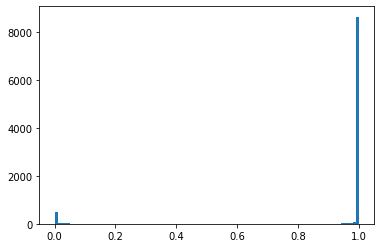

In [73]:
plt.hist(all_qid, bins = 100)
plt.show()

(array([ 8.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 99.]),
 array([1.29185055e-05, 1.00011400e-01, 2.00009882e-01, 3.00008363e-01,
        4.00006845e-01, 5.00005327e-01, 6.00003808e-01, 7.00002290e-01,
        8.00000772e-01, 8.99999253e-01, 9.99997735e-01]),
 <BarContainer object of 10 artists>)

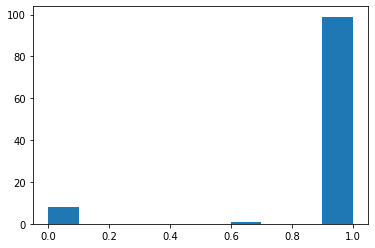

In [25]:
plt.hist([i.item() for i in qid[0]])

# Function to explore sentence breaks

In [95]:
def get_breakpoints(model, threshold, label, split = 'train', 
                      document = 0, forward_print = 2,
                      print_breakpoints = True):
    
    data = load_from_disk(RAW_DIR(f'20news/{split}/{label}'))
    list_of_sentences = sent_tokenize(data[document]['text'])
    
    location = f'20news/{model}/{split}/label_to_cutoff_indices_{threshold}.pkl'
    with open(SEGMENT_DIR(location), "rb") as handle:
        label_to_cutoff = pickle.load(handle)   
        
    breakpoints = label_to_cutoff[label][document]
    

    if print_breakpoints:
        for i in breakpoints:
            try:
                for j in range(forward_print+1):
                    print(f'[{i+j}]: {list_of_sentences[i+j]}')
            except IndexError as e:
                pass
            print('-------------------------------')
            
    return breakpoints

In [96]:
model = 'bert-base-uncased'
# thresholds = [0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
thresholds = [0.99, 0.999, 0.9999, 0.99999, 0.999999]
all_labels = os.listdir(RAW_DIR('20news/train'))
num_breakpoints = {l:{} for l in all_labels}
num_documents = 200

In [97]:
for l in all_labels:
    for t in thresholds:
        for d in range(num_documents):
            num_bp = len(get_breakpoints(model = 'bert-base-uncased', 
                              threshold = t,
                              label = l,
                              split = 'train',
                              forward_print = 2,
                              document = d,
                              print_breakpoints = False))

            try:
                num_breakpoints[l][d].append(num_bp)
            except KeyError:
                num_breakpoints[l][d] = [num_bp]
                

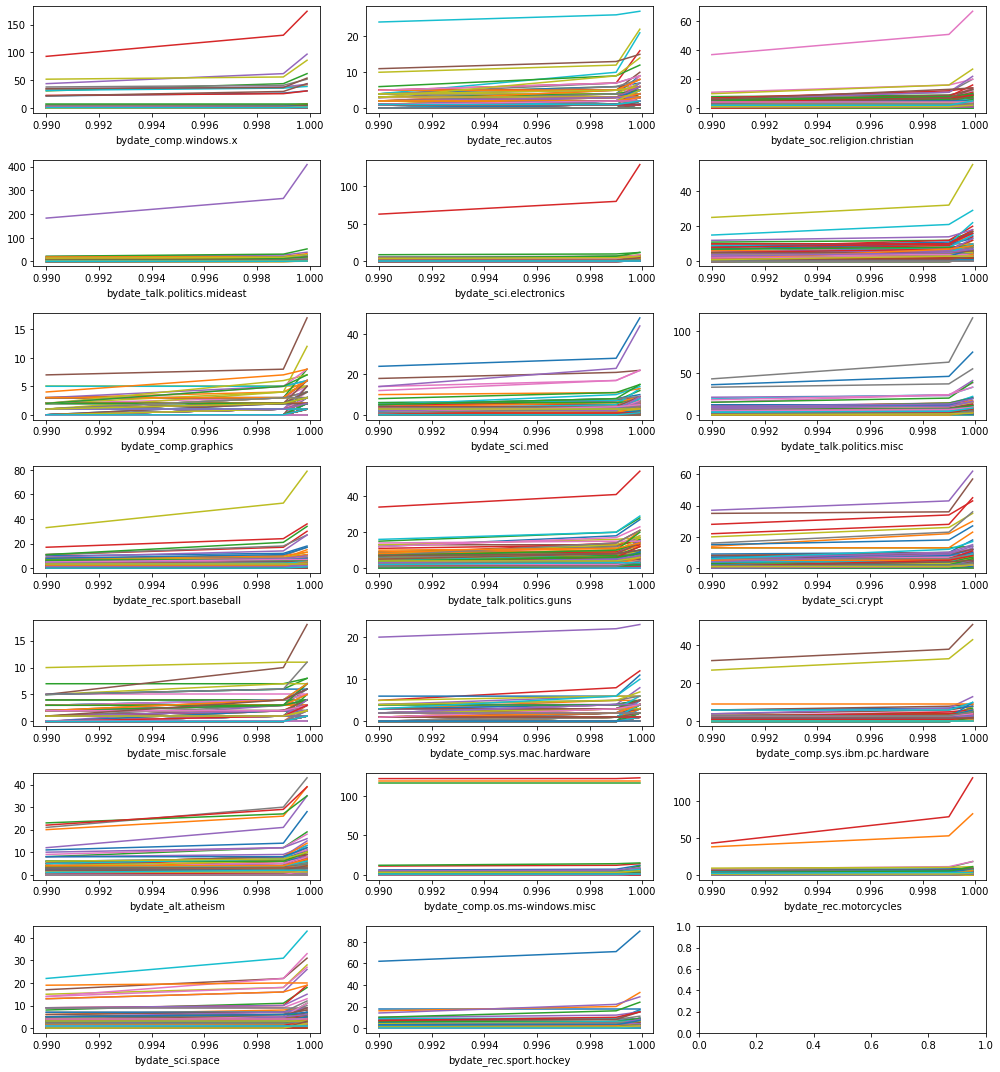

In [102]:
num_cols = 3
num_rows = int(np.ceil(len(all_labels)/3))
fig, ax = plt.subplots(ncols = 3, nrows = num_rows,
                      figsize = (num_rows * 2, num_cols * 5))
for i, l in enumerate(all_labels):
#     print(f"Plotting for {l}")
    for d in range(num_documents):
        ax[int(np.floor(i/3)),i%3].plot(thresholds[:-2], num_breakpoints[l][d][:-2])
    ax[int(np.floor(i/3)),i%3].set_xlabel(l, fontsize=10)

plt.tight_layout()